## Step 1: Load the Datasets
- **AQI Dataset**: Contains daily air quality measurements across various stations in Jakarta 2010 to 2023.
- **Weather Dataset**: Contains daily weather information in jakarta for the year 2020

We will later filter, clean, and merge these datasets for analysis.

In [1]:
import pandas as pd

# Load AQI dataset
aqi = pd.read_csv('../data/ispu_dki_all.csv')
print("AQI dataset shape:", aqi.shape)
display(aqi.head())

# Load Weather dataset
weather = pd.read_csv('../data/Jakarta, Indonesia 2020-01-01 to 2020-12-31.csv')
print("Weather dataset shape:", weather.shape)
display(weather.head())


AQI dataset shape: (4626, 11)


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


Weather dataset shape: (366, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Jakarta, Indonesia",2020-01-01,84.2,77.0,80.2,100.8,77.0,84.8,77.0,90.2,...,6.6,3,NaN,2020-01-01T05:41:41,2020-01-01T18:10:04,0.19,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
1,"Jakarta, Indonesia",2020-01-02,87.8,77.0,81.4,97.2,77.0,86.0,75.1,82.0,...,17.5,7,NaN,2020-01-02T05:42:12,2020-01-02T18:10:30,0.22,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
2,"Jakarta, Indonesia",2020-01-03,87.3,77.5,82.4,98.5,77.5,89.2,75.9,81.0,...,15.3,6,NaN,2020-01-03T05:42:43,2020-01-03T18:10:55,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
3,"Jakarta, Indonesia",2020-01-04,87.3,78.8,82.6,99.1,78.8,89.8,76.3,81.5,...,15.6,7,NaN,2020-01-04T05:43:13,2020-01-04T18:11:19,0.29,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
4,"Jakarta, Indonesia",2020-01-05,84.5,77.0,80.8,94.4,77.0,85.7,76.4,86.8,...,13.1,7,NaN,2020-01-05T05:43:44,2020-01-05T18:11:43,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."


## Step 2: Filter the AQI for year 2020

The AQI datasets contains the data recorded at various stations across Jakarta from 2010 to 2023.
To match the weather data (which is for 2020 only), we perform the following steps:

- Convert the `tanggal` colum to datetime format
- Filter the AQI dataset to only include rows from **2020**
- Keep only relevant pollutant column for analysis

In [2]:
# Convert 'tanggal' to datetime
aqi['tanggal'] = pd.to_datetime(aqi['tanggal'])

# Filter for 2020 only
aqi_2020 = aqi[aqi['tanggal'].dt.year == 2020]

# Keep only the necessary columns (optional, for clarity)
aqi_2020 = aqi_2020[['tanggal', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]

# Rename 'tanggal' to 'date' for consistency
aqi_2020.rename(columns={'tanggal': 'date'}, inplace=True)

# Preview
aqi_2020.head()


,date,pm10,pm25,so2,co,o3,no2
3629,2020-01-01,38.0,NaN,36.0,25.0,46.0,9.0
3630,2020-01-02,45.0,NaN,36.0,39.0,102.0,8.0
3631,2020-01-03,51.0,NaN,37.0,27.0,63.0,10.0
3632,2020-01-04,51.0,NaN,38.0,19.0,85.0,10.0
3633,2020-01-05,52.0,NaN,39.0,25.0,62.0,9.0


## Step 3: Prepare and clean the Weather Data for Merging

Before merging, we clean and prepare the weather dataset by:

- Keeping only relevant columns for air quality prediction, such as temperature, humidity, wind, and solar features
- Dropping unnecessary columns like sunrise, moonphase, station info, and descriptions
- Converting the `datetime` column into datetime format
- Renaming `datetime` to `date` for consistency with the AQI dataset

In [3]:
# Select only relevant columns for analysis
weather = weather[['datetime', 'tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windspeed', 'winddir', 'cloudcover', 'uvindex', 'solarenergy']].copy()

# Ensure 'date' column is in datetime format
weather['datetime'] = pd.to_datetime(weather['datetime'])

# Rename 'datetime' to 'date' for consistency with AQI dataset
weather.rename(columns={'datetime': 'date'}, inplace=True)

# Preview the cleaned weather data
weather.head()



,date,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipcover,windspeed,winddir,cloudcover,uvindex,solarenergy
0,2020-01-01,84.2,77.0,80.2,84.8,77.0,90.2,2.257,25.00,17.2,272.3,71.5,3,6.6
1,2020-01-02,87.8,77.0,81.4,86.0,75.1,82.0,1.680,8.33,9.2,274.9,64.0,7,17.5
2,2020-01-03,87.3,77.5,82.4,89.2,75.9,81.0,0.123,8.33,11.1,276.1,58.2,6,15.3
3,2020-01-04,87.3,78.8,82.6,89.8,76.3,81.5,0.010,12.50,12.1,293.8,62.0,7,15.6
4,2020-01-05,84.5,77.0,80.8,85.7,76.4,86.8,0.623,12.50,9.0,294.2,68.9,7,13.1


## Step 4: Merge AQI and Weather Data

We perform an **inner join** on "date".

This combines AQI and weather data into a single dataset, with one row per day in 2020.

We will also convert the temperature columns from Fahrenheit to Celsius

The result will be used for exploratory analysis and modelling.

In [4]:
# Merge AQI and Weather on 'date'
merged_df = pd.merge(aqi_2020, weather, on='date', how='inner')

# Convert the temperature columns from Fahrenheit to Celsius
merged_df['tempmax'] = (merged_df['tempmax'] - 32) * 5.0/9.0
merged_df['tempmin'] = (merged_df['tempmin'] - 32) * 5.0/9.0
merged_df['temp'] = (merged_df['temp'] - 32) * 5.0/9.0
merged_df['feelslike'] = (merged_df['feelslike'] - 32) * 5.0/9.0

# Round the floating point numbers to 2 decimal places
merged_df = merged_df.round(2)

# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in merged dataset:\n", missing_values[missing_values > 0])




Missing values in merged dataset:
 pm25    242
so2      13
co        1
dtype: int64


In [5]:
# drop columns with missing values (pm25) since there are too many missing values. We can use pm10 as the main indicator instead.
merged_df.drop(columns=['pm25'], inplace=True)


# Preview result
print("Merged dataset shape:", merged_df.shape)
merged_df.head()

Merged dataset shape: (243, 19)


,date,pm10,so2,co,o3,no2,tempmax,tempmin,temp,feelslike,dew,humidity,precip,precipcover,windspeed,winddir,cloudcover,uvindex,solarenergy
0,2020-01-01,38.0,36.0,25.0,46.0,9.0,29.00,25.00,26.78,29.33,77.0,90.2,2.26,25.00,17.2,272.3,71.5,3,6.6
1,2020-01-02,45.0,36.0,39.0,102.0,8.0,31.00,25.00,27.44,30.00,75.1,82.0,1.68,8.33,9.2,274.9,64.0,7,17.5
2,2020-01-03,51.0,37.0,27.0,63.0,10.0,30.72,25.28,28.00,31.78,75.9,81.0,0.12,8.33,11.1,276.1,58.2,6,15.3
3,2020-01-04,51.0,38.0,19.0,85.0,10.0,30.72,26.00,28.11,32.11,76.3,81.5,0.01,12.50,12.1,293.8,62.0,7,15.6
4,2020-01-05,52.0,39.0,25.0,62.0,9.0,29.17,25.00,27.11,29.83,76.4,86.8,0.62,12.50,9.0,294.2,68.9,7,13.1


## Step 5: Exploratory Data Analysis and Dataset Enrichment

This step focuses on exploring the merged dataset and performing transformations that echance the dataset's analytical value.

Key operations include:
- Extracting date-related features such as "month" and "dayofweek"
- Creating binary flags like "is_hot_day" and `is_polluted_day`
- Visualizing data patterns
- Identifying correlations

These steps help draw meaningful insights and prepare the dataset for hypothesis testing.

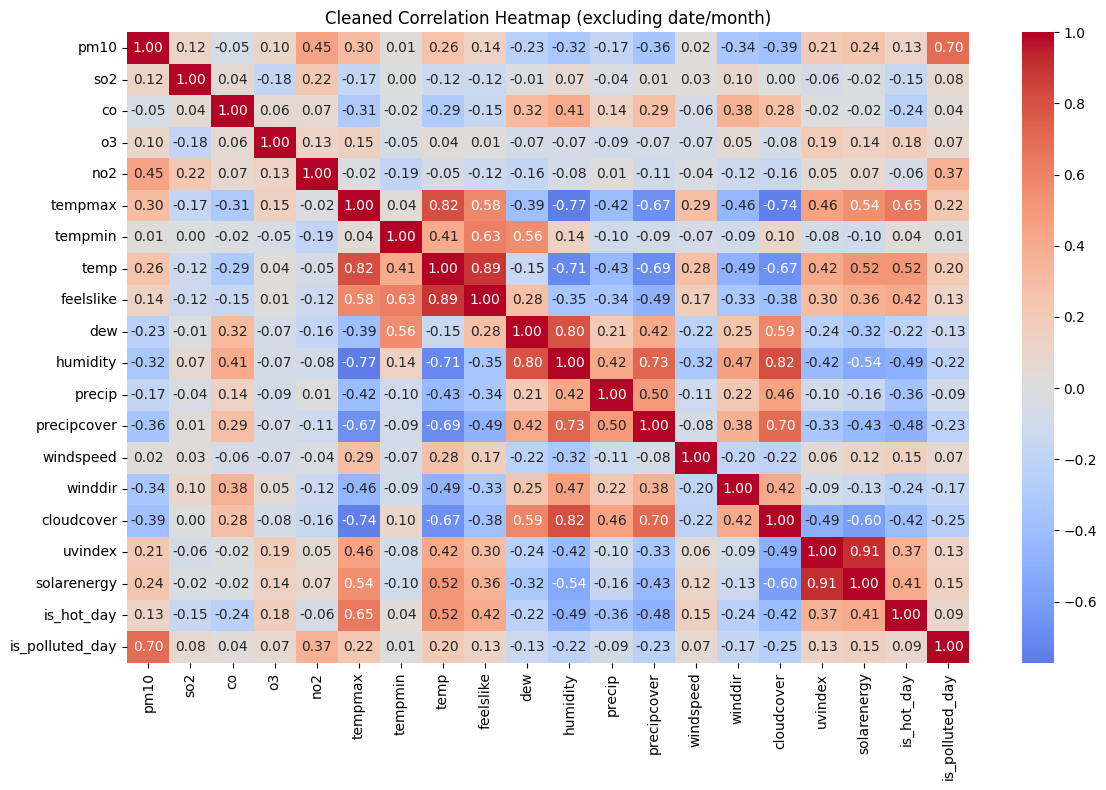

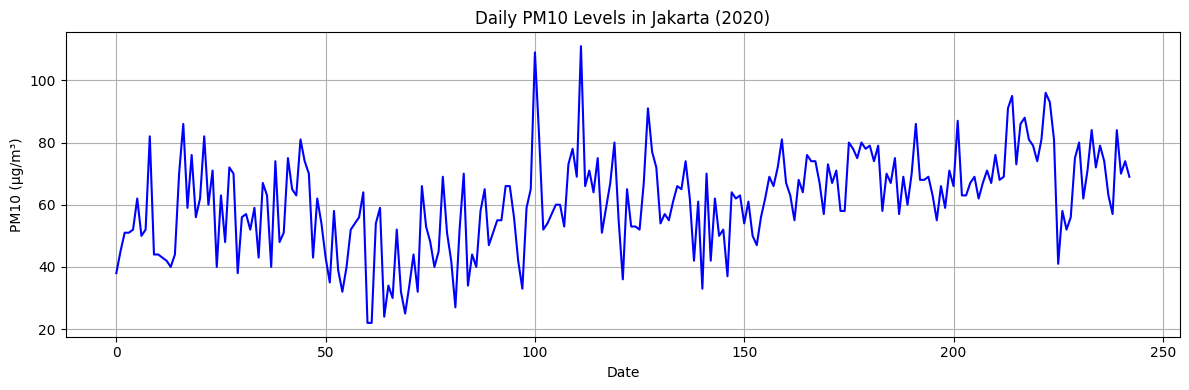

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering: Extract date components
# Extract month and weekday
merged_df['month'] = merged_df['date'].dt.month
merged_df['dayofweek'] = merged_df['date'].dt.dayofweek # Monday=0, Sunday=6

# Create flags for analysis
merged_df['is_hot_day'] = merged_df['tempmax'] > 30
merged_df['is_polluted_day'] = merged_df['pm10'] > 71 

# Preview the flagged values, include date from the index
merged_df[['tempmax', 'pm10', 'is_hot_day', 'is_polluted_day']].head()

# Create a heatmap to visualize correlations between features
# Exclude 'date', 'month', and 'dayofweek' as they are not meaningful for correlation analysis
corr_features = merged_df.drop(columns=['date', 'month', 'dayofweek'])
plt.figure(figsize=(12, 8))
sns.heatmap(corr_features.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Cleaned Correlation Heatmap (excluding date/month)")
plt.tight_layout()
plt.show()

# Create a plot to visualize the the PM10 over time
merged_df['pm10'].plot(figsize=(12, 4), title='Daily PM10 Levels in Jakarta (2020)', color='blue')
plt.ylabel('PM10 (µg/m³)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


### Heatmap Correlation
Shows the correlation between each values. The more it is closer to the value 1 or -1 the more they correlate with each other.

### PM10 Over Time Plot
This line plot shows the daily PM10 levels in Jakarta throughout 2020. While the values fluctuate, certain periods shows consistently higher pollution levels, possibly due to dry seasons or increased human activity.

## Step 6: Train-Test Split

To avoid data leakage and preserve the time-dependent structure of the dataset, we split the data chronologically with a 80-20 split, with the first 80% of datas for training and the last 20% for testing.
This ensures the model is trained on past data and evaluated on unseen future data, which mimics the real-world forecasting.

In [7]:
# Reset index just in case 'date' is not a column
merged_df.reset_index(inplace=True)

# Sort by date just in case
merged_df.sort_values(by='date', inplace=True)

# Set data as index for time series analysis
merged_df.set_index('date', inplace=True)

# Calculate split index
split_index = int(len(merged_df) * 0.8)

# Split the data into training and testing sets
train_data = merged_df.iloc[:split_index]
test_data = merged_df.iloc[split_index:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (194, 23)
Testing data shape: (49, 23)


## Step 7: Model Selection

We start with a simple and interpretable model — **Linear Regression** — to establish a baseline for AQI prediction. 
This will help us understand how well basic weather features can explain air quality trends.

In [8]:
from sklearn.linear_model import LinearRegression

# Define features (x) and target (y)
features = ['tempmax', 'humidity', 'precip', 'windspeed', 'winddir', 'cloudcover', 'uvindex']
target = 'pm10'

x_train = train_data[features]
y_train = train_data[target]

x_test = test_data[features]
y_test = test_data[target]

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Step 8: Model Evaluation

To assess the performance of our Linear Regression model, we use three standard evaluation metrics:

- **MAE (Mean Absolute Error)**: Average absolute difference between predicted and actual values.
- **RMSE (Root Mean Squared Error)**: Penalizes larger errors more heavily than MAE.
- **R^2 Score**: Indicates how well the independent variables explain the variation in the dependent variable.

These metrics give us insights into the model's accuracy and ability to generalize to unseen data.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 12.564009942519904
Root Mean Squared Error (RMSE): 16.011995135870304
R-squared (R2): -0.9213514730356731


## Step 9: Hypothesis Testing

To explore whether specific weather conditions significantly impact air quality, we conduct a statistical hypothesis test.

**Research Question:**
Does temperature significantly affect PM10 levels?

We perform an independent t-test comparing PM10 levels on hot days (>30°C) vs. non-hot days (≤30°C).

**Hypotheses:**

- **Null Hypothesis (H₀):** There is no significant difference in PM10 levels between hot and non-hot days.
- **Alternative Hypothesis (H₁):** PM10 levels on hot days arte significantly different from those on non-hot days.

We use a significance level of 0.05 (α = 5%).

T-statistic: 2.188926853107524
P-value: 0.03952792917313061
Reject the null hypothesis: Temperature *does* significantly affect PM10 levels.


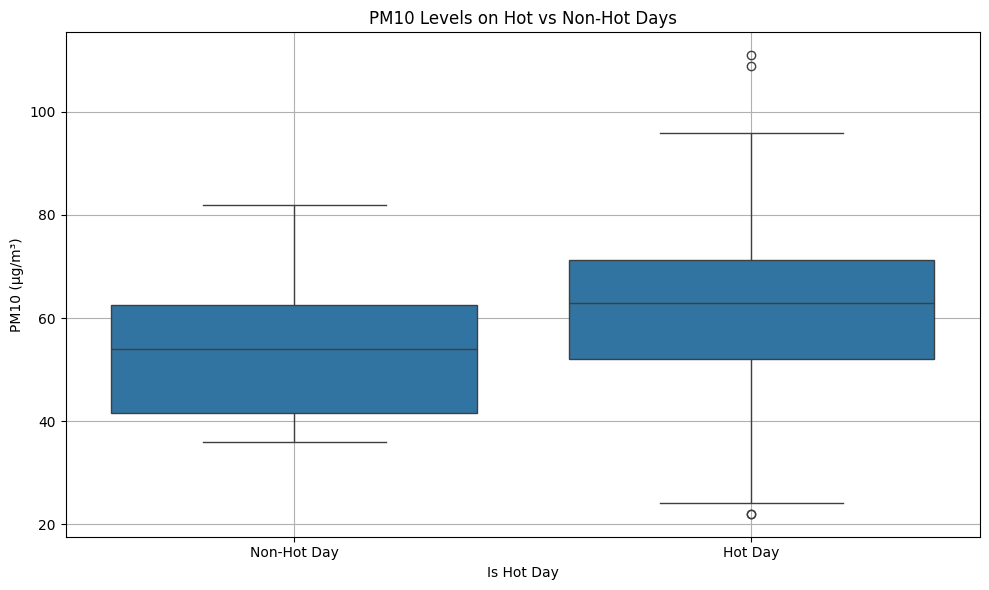

In [10]:
from scipy.stats import ttest_ind

# Separate PM10 values based on 'is_hot_day' flag
hot_days_pm10 = merged_df[merged_df['is_hot_day']]['pm10'].dropna()
non_hot_days_pm10 = merged_df[~merged_df['is_hot_day']]['pm10'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(hot_days_pm10, non_hot_days_pm10, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: Temperature *does* significantly affect PM10 levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PM10 levels based on temperature.")

# Create a boxplot to visualize the PM10 levels on hot and non-hot days
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['is_hot_day'], y=merged_df['pm10'])
plt.title('PM10 Levels on Hot vs Non-Hot Days')
plt.xlabel('Is Hot Day')
plt.ylabel('PM10 (µg/m³)')
plt.xticks([0, 1], ['Non-Hot Day', 'Hot Day'])
plt.grid(True)
plt.tight_layout()
plt.show()


### PM10 vs Temperature (Hot vs Non-hot Days)
The boxplot compares pollution levels on hot days (>30°C) versus cooler days. Hot days generally show higher median PM10 levels, supporting the hypothesis that temperature may influence air quality.

## Step 10: Final Report
### 1. Introduction
Air pollution is a significant issue in Jakarta, impacting public health and urban living. This project aims to forecast Air Quality Index (AQI), specifically the PM10 levels, using weather data in Jakarta during the year 2020. The goal is to explore how weather patterns affect air pollution and whether predictive models can be built to anticipate pollution levels.

### 2. Dataset Overview
- **AQI Dataset:** Daily PM10 and other pollutant measurements from various stations (random station per day).
- **Weather Dataset:** Daily weather records for Jakarta including temperature, humidity, windspeed, etc.
- **Filtered Year:** Both datasets were filtered to include only data from the year 2020.
- **Merge Key:** The datasets were merged on the `date` column.

### 3. Data Preprocessing
- Converted `tanggal` and `datetime` columns to datetime objects.
- Renamed columns for consistency (e.g., `tanggal` and `datetime` to `date`).
- Selected relevant columns from the weather dataset.
- Converted temperature columns from Fahrenheit to Celsius.
- Checked and drop the columns with so many missing values.

### 4. Feature Engineering
- Extracted `month` and `dayofweek` from the `date`.
- Created binary flags:
    - `is_hot_day`: Temp max > 30°C
    - `is_polluted_day`: PM10 > 71 (75th percentile)

### 5. Exploratory Data Analysis
- Previewed merged data.
- Generated correlation heatmap (excluding `date`, `month`, `dayofweek`).
- **Key Observations:**
    - `tempmax` has moderate positive correlation with PM10.
    - Humidity shows a slight negative correlation with PM10.

### 6. Train-Test Split
To preserve the temporal nature of the data, a time-aware split was used:
- **Train Set:** First 80% of the time-ordered data.
- **Test Set:** Remaining 20%.

### 7. Model Selection
- **Model Used:** Linear Regression (baseline model).
- **Features Selected:**
    - tempmax, humidity, precip, windspeed, winddir, cloudcover, uvindex
- **Target**: pm10

### 8. Evaluation
Model performance metrics on the test set:
- **MAE (Mean Absolute Error):** ~12.56
- **RMSE (Root Mean Squared Error):** ~16.01
- **R² (R-squared):** ~-0.92
**Interpretation:** The model performs poorly (negative R²), indicating that it does worse than simply predicting the mean.

### 9. Hypothesis Testing
**Question:** Does temperature significantly affect PM10 levels?
- **Method:** Independent t-test between `is_hot_day=True` and `is_hot_day=False` groups.
- **Result:**
    - T-statistic: 2.1889
    - P-value: 0.0395
- **Conclusion:** Reject the null hypothesis. Temperature *does* significantly affect PM10 levels.

#### Note: Correlation vs. Hypothesis Testing
ALthough the correlation heatmap shows a **low correlation (0.09)** between `is_hot_day` and `is_polluted_day`, our **t-test results indicate a statistically significant difference** in PM10 levels between hot and non-hot days.

This apparent contradiction is due to the difference in the nature of the tests:
- **Correlation (Pearson's r)** measures **linear relationships** between **continuous variables**. Since `is_hot_day` is a **binary flag**, Pearson correlation isn't ideal for detecting differences between groups.
- **T-tests** compare the **means of two groups**, and are **more appropriate** when one variable is binary and the other is continuous.

Therefore, even though the correlation is weak, the t-test shows that temperature **does have a statistically significant effect** on PM10 levels.

### 10. Limitations & Next Steps
While Linear Regression was useful as a baseline model, it can be improved by using another non-linear models, adding more feature enrichments etc.

### 11. Conclusions
This projects successfully walks through a basic AQI forecasting pipeline using real-world data. Despite the baseline model's displays poor performance in some aspects, it still gives valuable insights through Exploratory Data Analysis and hypothesis testing.

